# <u>`HEALTHCARE FRAUD DETECTION ANALYSIS`<u>

In [30]:
## Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## `Loading Datasets`

In [31]:
##Datasets
provider_data=pd.read_csv('provider_fraud_detection_data.csv')
Beneficiary_data=pd.read_csv('Train_Beneficiarydata-1542865627584.csv')
Inpatient_data= pd.read_csv('Train_Inpatientdata-1542865627584.csv')
Outpatient_data=pd.read_csv('Train_Outpatientdata-1542865627584.csv')

## `Data Preprocessing`

- Check missing values
- Duplicates
- display total number of rows


In [32]:
#creating data_preprocessing function 
def data_preprocessing(data):
    # Check for missing values
    missing_values = data.isnull().sum().sum()
    print("Missing Values:")
    print(missing_values)
    print()

    # Check for duplicates
    duplicates = data.duplicated().sum()
    print("Number of Duplicates:", duplicates)
    print()

    # Display total number of rows
    num_rows = data.shape[0]
    print("Total Number of Rows:", num_rows)
    print()



    # Statistical summary
    print("Statistical Summary:")
    print(data.describe(include='all'))


### Provider Data

In [33]:
## displaying the data
provider_data.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No



The  `provider_data` dataset consists of provider IDs and a flag indicating potential fraud.

In [34]:
# calling the data processing function
data_preprocessing(provider_data)

Missing Values:
0

Number of Duplicates: 0

Total Number of Rows: 5410

Statistical Summary:
        Provider PotentialFraud
count       5410           5410
unique      5410              2
top     PRV51001             No
freq           1           4904


The `provider_data` dataset has no missing values or duplicates. 

It contains 5,410 unique providers and includes a flag for potential fraud cases.

In [35]:
#displays the count of providers in each fraud category.
x=provider_data.groupby(['PotentialFraud']).count()
x

,Provider
PotentialFraud,
No,4904
Yes,506



The `provider_data` dataset consists of providers categorized as either "No" (not involved in fraud) or "Yes" (potentially involved in fraud). There are 4,904 providers classified as "No" and 506 providers classified as "Yes".

### Out patient data

In [36]:
#displaying the outpatient data
Outpatient_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [37]:
#calling the function
data_preprocessing(Outpatient_data)

Missing Values:
8093719

Number of Duplicates: 0

Total Number of Rows: 517737

Statistical Summary:
           BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
count      517737     517737       517737      517737    517737   
unique     133980     517737          385         366      5012   
top     BENE42721  CLM624349   2009-03-03  2009-03-03  PRV51459   
freq           29          1         1574        1563      8240   
mean          NaN        NaN          NaN         NaN       NaN   
std           NaN        NaN          NaN         NaN       NaN   
min           NaN        NaN          NaN         NaN       NaN   
25%           NaN        NaN          NaN         NaN       NaN   
50%           NaN        NaN          NaN         NaN       NaN   
75%           NaN        NaN          NaN         NaN       NaN   
max           NaN        NaN          NaN         NaN       NaN   

        InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
count            51773

*Missing Values:* There are 8,093,719 missing values in the dataset.

*Number of Duplicates:* There are no duplicate rows in the dataset.

*Total Number of Rows:* The dataset contains 517,737 rows.

*Statistical Summary:* The summary shows the mean, standard deviation, minimum, 25th percentile, 50th percentile (median), 75th percentile, and maximum values for numeric columns.

In [38]:
#Generating column information summary
Outpatient_data_info = pd.DataFrame(data=Outpatient_data.columns, columns=['Column Name'])
Outpatient_data_info['Data Type'] = Outpatient_data.dtypes.values
Outpatient_data_info['No. of Unique Values'] = Outpatient_data.nunique().values
Outpatient_data_info['Count of Missing Values'] = Outpatient_data.isna().sum().values
Outpatient_data_info['Percent of Missing Values'] = (round(Outpatient_data.isna().sum() / len(Outpatient_data) * 100)).values


In [39]:
Outpatient_data_info.head()

,Column Name,Data Type,No. of Unique Values,Count of Missing Values,Percent of Missing Values
0,BeneID,object,133980,0,0.0
1,ClaimID,object,517737,0,0.0
2,ClaimStartDt,object,385,0,0.0
3,ClaimEndDt,object,366,0,0.0
4,Provider,object,5012,0,0.0


### In Patient data

In [40]:
# displaying the inpatient data
Inpatient_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [41]:
# calling the function
data_preprocessing(Inpatient_data)

Missing Values:
344003

Number of Duplicates: 0

Total Number of Rows: 40474

Statistical Summary:
            BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
count        40474     40474        40474       40474     40474   
unique       31289     40474          398         365      2092   
top     BENE134170  CLM46614   2009-02-10  2009-02-11  PRV52019   
freq             8         1          145         153       516   
mean           NaN       NaN          NaN         NaN       NaN   
std            NaN       NaN          NaN         NaN       NaN   
min            NaN       NaN          NaN         NaN       NaN   
25%            NaN       NaN          NaN         NaN       NaN   
50%            NaN       NaN          NaN         NaN       NaN   
75%            NaN       NaN          NaN         NaN       NaN   
max            NaN       NaN          NaN         NaN       NaN   

        InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
count             40474.

In [42]:
#Generating column information summary
Inpatient_data_info = pd.DataFrame(data=Inpatient_data.columns, columns=['Column Name'])
Inpatient_data_info['Data Type'] = Inpatient_data.dtypes.values
Inpatient_data_info['No. of Unique Values'] = Inpatient_data.nunique().values
Inpatient_data_info['Count of Missing Values'] = Inpatient_data.isna().sum().values
Inpatient_data_info['Percent of Missing Values'] = (round(Inpatient_data.isna().sum() / len(Inpatient_data) * 100)).values


In [43]:
Inpatient_data_info.head()

,Column Name,Data Type,No. of Unique Values,Count of Missing Values,Percent of Missing Values
0,BeneID,object,31289,0,0.0
1,ClaimID,object,40474,0,0.0
2,ClaimStartDt,object,398,0,0.0
3,ClaimEndDt,object,365,0,0.0
4,Provider,object,2092,0,0.0


### Beneficiary Data

In [44]:
# displaying the dataset
Beneficiary_data.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [45]:
# calling the function
data_preprocessing(Beneficiary_data)

Missing Values:
137135

Number of Duplicates: 0

Total Number of Rows: 138556

Statistical Summary:
           BeneID         DOB         DOD         Gender           Race  \
count      138556      138556        1421  138556.000000  138556.000000   
unique     138556         900          11            NaN            NaN   
top     BENE11001  1939-10-01  2009-12-01            NaN            NaN   
freq            1         540         182            NaN            NaN   
mean          NaN         NaN         NaN       1.570932       1.254511   
std           NaN         NaN         NaN       0.494945       0.717007   
min           NaN         NaN         NaN       1.000000       1.000000   
25%           NaN         NaN         NaN       1.000000       1.000000   
50%           NaN         NaN         NaN       2.000000       1.000000   
75%           NaN         NaN         NaN       2.000000       1.000000   
max           NaN         NaN         NaN       2.000000       5.000000   


In [46]:
# Generating column information summary
Beneficiary_data_info = pd.DataFrame(data=Beneficiary_data.columns, columns=['Column Name'])
Beneficiary_data_info['Data Type'] = Beneficiary_data.dtypes.values
Beneficiary_data_info['No. of Unique Values'] = Beneficiary_data.nunique().values
Beneficiary_data_info['Count of Missing Values'] = Beneficiary_data.isna().sum().values
Beneficiary_data_info['Percent of Missing Values'] = (round(Beneficiary_data.isna().sum() / len(Beneficiary_data) * 100)).values

In [47]:
Beneficiary_data_info.head()

,Column Name,Data Type,No. of Unique Values,Count of Missing Values,Percent of Missing Values
0,BeneID,object,138556,0,0.0
1,DOB,object,900,0,0.0
2,DOD,object,11,137135,99.0
3,Gender,int64,2,0,0.0
4,Race,int64,4,0,0.0


### `Checking for common columns in outpatients and inpatient dataset`

In [48]:
# checking for common cols in the outpatient, inpatient datasets
col_outpatient=[]
for o in Outpatient_data.columns:
    if o in Inpatient_data.columns:
        col_outpatient.append(o)

#Checking each of the columns in the Inpatient dataset if they are present in the Outpatient dataset
col_inpatient=[]
for i in Inpatient_data.columns:
    if i in Outpatient_data.columns:
        col_inpatient.append(i)
print("Cols of Outpatient dataset also present in Inpatient dataset",len(col_outpatient))
print("Cols of Inpatient dataset also present in Outpatient dataset",len(col_inpatient))

#Checking for common column names in the outpatient and the inpatient datasets 
common_cols= set(col_outpatient).intersection(set(col_inpatient))
common_cols= list(common_cols)
print("Common columns between the outpatient and the inpatient datasets",len(common_cols))

Cols of Outpatient dataset also present in Inpatient dataset 27
Cols of Inpatient dataset also present in Outpatient dataset 27
Common columns between the outpatient and the inpatient datasets 27


In [49]:
#displaying the cols
common_cols

['ClmProcedureCode_4',
 'ClmAdmitDiagnosisCode',
 'BeneID',
 'DeductibleAmtPaid',
 'InscClaimAmtReimbursed',
 'ClaimID',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClaimStartDt',
 'OperatingPhysician',
 'ClmDiagnosisCode_3',
 'AttendingPhysician',
 'ClmDiagnosisCode_7',
 'ClaimEndDt',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_10',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_6',
 'ClmProcedureCode_6',
 'ClmProcedureCode_2',
 'Provider',
 'ClmProcedureCode_1',
 'ClmProcedureCode_5',
 'OtherPhysician',
 'ClmDiagnosisCode_4',
 'ClmProcedureCode_3',
 'ClmDiagnosisCode_5']

In [54]:
patient_data = pd.merge(Outpatient_data,Inpatient_data,left_on=common_cols,right_on=common_cols,how='outer')
patient_data

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,0.0,56409,NaN,NaN,NaN
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,0.0,79380,NaN,NaN,NaN
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,0.0,71947,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2851,...,NaN,NaN,NaN,NaN,NaN,1068.0,2859,2009-09-28,2009-10-02,812
558207,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,42823,...,NaN,NaN,NaN,NaN,NaN,1068.0,79902,2009-11-03,2009-11-06,228
558208,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,4280,...,NaN,NaN,NaN,NaN,NaN,1068.0,78605,2009-11-18,2009-11-22,302
558209,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,7802,...,NaN,NaN,NaN,NaN,NaN,1068.0,7802,2009-12-17,2009-12-18,309


In [51]:
"""Allpatientdata=pd.merge(Outpatient_data,Inpatient_data,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')"""

"Allpatientdata=pd.merge(Outpatient_data,Inpatient_data,\n                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',\n       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',\n       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',\n       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',\n       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',\n       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',\n       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',\n       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',\n       'ClmAdmitDiagnosisCode'],\n                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',\n       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',\n       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',\n       'ClmDiagnosisCode_3', 'ClmDi

In [55]:
# displaying the merged datasets 
patient_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,0.0,56409,NaN,NaN,NaN
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,0.0,79380,NaN,NaN,NaN
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,0.0,71947,NaN,NaN,NaN


In [56]:
# Merge Allpatientdata with beneficiary data
all_patient = pd.merge(patient_data,Beneficiary_data,
                            left_on='BeneID',right_on='BeneID',how='outer')
print('Shape:', all_patient.shape)
all_patient.head()

Shape: (558211, 54)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,2,2,2,0,0,30,50
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,2,2,1,2,2,2,0,0,90,40
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,2,1,1,1,1,2,0,0,1810,760


In [57]:
# Merge the final dataset with the provider
final_df = pd.merge(all_patient,provider_data,left_on= 'Provider',right_on='Provider',how='outer')
print('Shape:', final_df.shape)
final_df.head()

Shape: (558211, 55)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,2,2,0,0,30,50,Yes
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,1,1,1,1,2,0,0,1810,760,Yes
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,1,1,1,1,2,0,0,1810,760,Yes
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,1,1,1,1,2,0,0,1810,760,Yes
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,1,1,1,1,2,0,0,1810,760,Yes


In [58]:
final_df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'AdmissionDt', 'DischargeDt',
       'DiagnosisGroupCode', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCon

In [59]:
# Displaying the general information of final_df
final_df_info = pd.DataFrame(data=final_df.columns, columns=['Column Name'])
final_df_info['Data Type'] = final_df.dtypes.values
final_df_info['No. of Unique Values'] = final_df.nunique().values
final_df_info['Count of Missing Values'] = final_df.isna().sum().values
final_df_info['Percent of Missing Values'] = (round(final_df.isna().sum() / len(final_df) * 100)).values

In [60]:
final_df_info.head()

,Column Name,Data Type,No. of Unique Values,Count of Missing Values,Percent of Missing Values
0,BeneID,object,138556,0,0.0
1,ClaimID,object,558211,0,0.0
2,ClaimStartDt,object,398,0,0.0
3,ClaimEndDt,object,366,0,0.0
4,Provider,object,5410,0,0.0


### `Handling Missing Values`

In [61]:
# Select the relevant columns
columns = ['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'AdmissionDt', 'DischargeDt',
       'DiagnosisGroupCode', 'DOB', 'DOD', 'Gender',
       'RenalDiseaseIndicator', 'State', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'PotentialFraud']

In [62]:
# Final df with the relevant columns
final_df = final_df[columns]

final_df.shape

(558211, 53)

In [65]:
%pip install fancyimpute

  Using cached setuptools-68.0.0-py3-none-any.whl (804 kB)
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=3cef7250d6b516a738745dc617f4e7963661180d1d6eb674941b4d4fcfab5776
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\f9\fc\6a\b0406b906bce293abe23c3b6da5a72637d2d04146ef1125a0b
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=8d96efdbb3e5b8906df2cfa382666e12f6fe340bd1f71503a73661f8128be872
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\88\c4\be\e232c750d9bc360abf9a5e2cafe0d3e08e3605d2801bb11684
Successfully built fancyimpute knnimpute
  Attempting uninstall: setuptools
    Found existing installation: setuptools 61.2.0
    Uninstalling setuptools-61.2.0:
      Successfully uninstalled setuptools-61.2.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.


In [72]:
from fancyimpute import KNN, IterativeImputer #algorithm importing from fancyimpute module
final_df_knn=final_df.copy()   #creating copy of train beneficiary data
final_df_mice=final_df.copy()  #creating copy of train beneficiary data

knn=KNN()


final_df_knn.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,2,2,0,0,30,50,Yes
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,1,1,1,1,2,0,0,1810,760,Yes
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,1,1,1,1,2,0,0,1810,760,Yes
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,1,1,1,1,2,0,0,1810,760,Yes
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,1,1,1,1,2,0,0,1810,760,Yes


In [73]:
final_df_knn.isnull().sum()

BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10                553201
ClmProcedureCode_1                 534901
ClmProcedureCode_2                 552721
ClmProcedureCode_3                 557242
ClmProcedureCode_4                 558093
ClmProcedureCode_5                

In [74]:
final_df_knn.dtypes

BeneID                              object
ClaimID                             object
ClaimStartDt                        object
ClaimEndDt                          object
Provider                            object
InscClaimAmtReimbursed               int64
AttendingPhysician                  object
OperatingPhysician                  object
OtherPhysician                      object
ClmDiagnosisCode_1                  object
ClmDiagnosisCode_2                  object
ClmDiagnosisCode_3                  object
ClmDiagnosisCode_4                  object
ClmDiagnosisCode_5                  object
ClmDiagnosisCode_6                  object
ClmDiagnosisCode_7                  object
ClmDiagnosisCode_8                  object
ClmDiagnosisCode_9                  object
ClmDiagnosisCode_10                 object
ClmProcedureCode_1                 float64
ClmProcedureCode_2                 float64
ClmProcedureCode_3                 float64
ClmProcedureCode_4                 float64
ClmProcedur

In [75]:
# mice instance
mice=IterativeImputer(random_state=102)

In [76]:

final_df_mice.loc[:, 'IPAnnualReimbursementAmt':'OPAnnualDeductibleAmt'] = mice.fit_transform(final_df_knn.loc[:, 'IPAnnualReimbursementAmt':'OPAnnualDeductibleAmt'])

In [77]:
final_df_mice.isna().sum()

BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10                553201
ClmProcedureCode_1                 534901
ClmProcedureCode_2                 552721
ClmProcedureCode_3                 557242
ClmProcedureCode_4                 558093
ClmProcedureCode_5                

### `Handling Outliers`

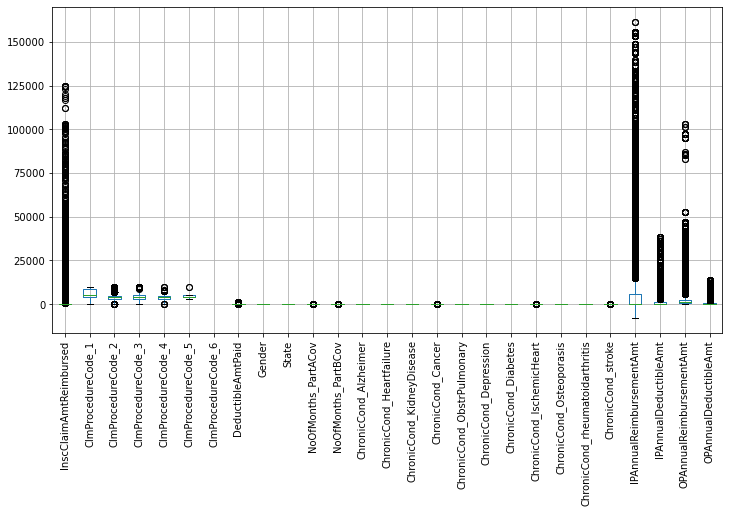

In [78]:
# Box plot to check for the outliers
plt.figure(figsize=(12,6))
final_df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [79]:
from scipy.stats.mstats import winsorize

# Specify the percentile limits for Winsorization
lower_limit = 0.05  # Lower percentile limit
upper_limit = 0.95  # Upper percentile limit

# Apply Winsorization to specific columns
column_to_winsorize = ['ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4']
for column in column_to_winsorize:
    final_df[column] = winsorize(final_df[column], limits=(lower_limit, upper_limit))


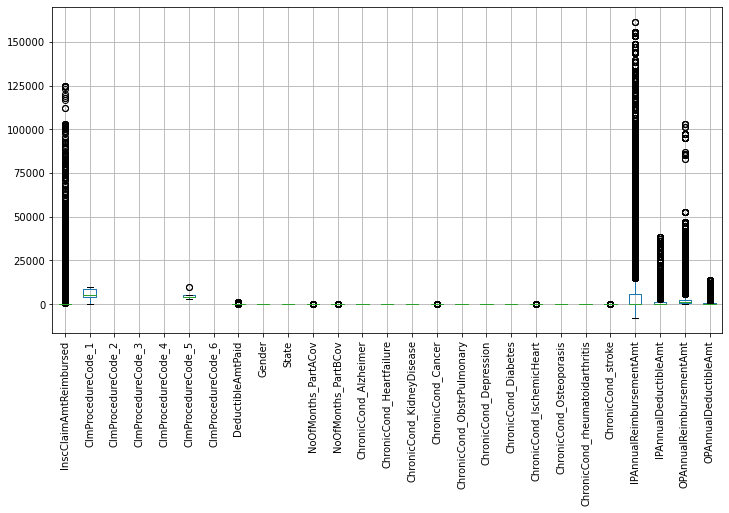

In [80]:
# Check on the outliers
plt.figure(figsize=(12,6))
final_df.boxplot()
plt.xticks(rotation=90)
plt.show()

### Exploratory Data Analysis(EDA)

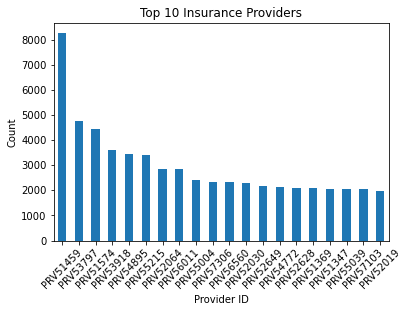

In [81]:
count = final_df['Provider'].value_counts()[:20]
count.plot(kind='bar')

# Set the plot title and labels
plt.title('Top 10 Insurance Providers')
plt.xlabel('Provider ID')
plt.ylabel('Count')
# Set xticks rotation=45
plt.xticks(rotation=45)

# Display the plot
plt.show() 

Text(0.5, 1.0, 'Distribution of Least 20 Popular Providers')

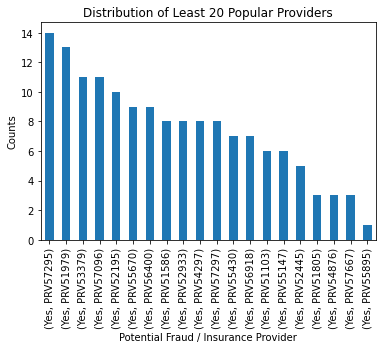

In [82]:
final_df.groupby('PotentialFraud')['Provider'].value_counts(ascending=False)[5390:].plot(kind='bar');
plt.xlabel('Potential Fraud / Insurance Provider')
plt.ylabel('Counts')
plt.title('Distribution of Least 20 Popular Providers')

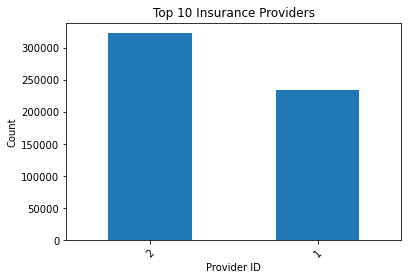

In [83]:
# Check the distribution of insurance beneficiaries by gender
count = final_df['Gender'].value_counts()[:20]
count.plot(kind='bar')

# Set the plot title and labels
plt.title('Top 10 Insurance Providers')
plt.xlabel('Provider ID')
plt.ylabel('Count')
# Set xticks rotation=45
plt.xticks(rotation=45)

# Display the plot
plt.show() 

In [85]:
#final_df.groupby('Gender')['State'].value_counts(ascending=False)[:20].plot(kind='bar');
plt.show()